<h1>Exercise 6</h1>
TKO_7093 Statistical Data Analysisimport pandas as pd 
import scipy
from scipy import stats
import numpy as np

In [2]:
import pandas as pd 
import scipy
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2>1. Explore "iris" data set</h2>

1. Load the classical "iris" data set.
See https://www.geeksforgeeks.org/python-basics-of-pandas-using-iris-dataset/
2. Plot the Sepal length (on X axis) vs. Sepal width (on Y axis)
3. Create scatter plots for all feature pairs (4 x 4)

In [20]:
# 1.1
loc = r'iris_csv.csv'
df = pd.read_csv(loc, sep=",", header=0)
df['class'] = pd.Categorical(df['class']).rename_categories(('satosa', 'versicolor', 'virginica'))
df

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,satosa
1,4.9,3.0,1.4,0.2,satosa
2,4.7,3.2,1.3,0.2,satosa
3,4.6,3.1,1.5,0.2,satosa
4,5.0,3.6,1.4,0.2,satosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


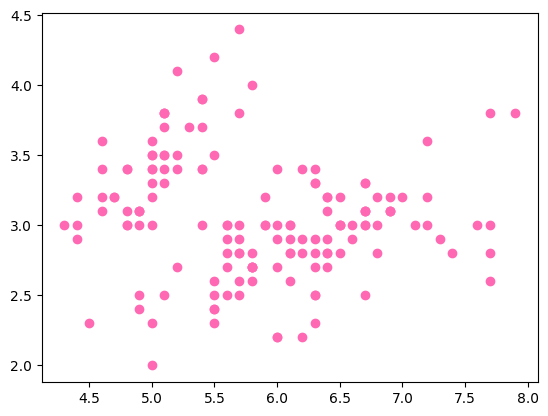

In [7]:
# 1.2
f1 = plt.figure(1)
x = df.sepallength
y = df.sepalwidth
plt.scatter(x, y, color = 'hotpink')
plt.show()

<Figure size 640x480 with 0 Axes>

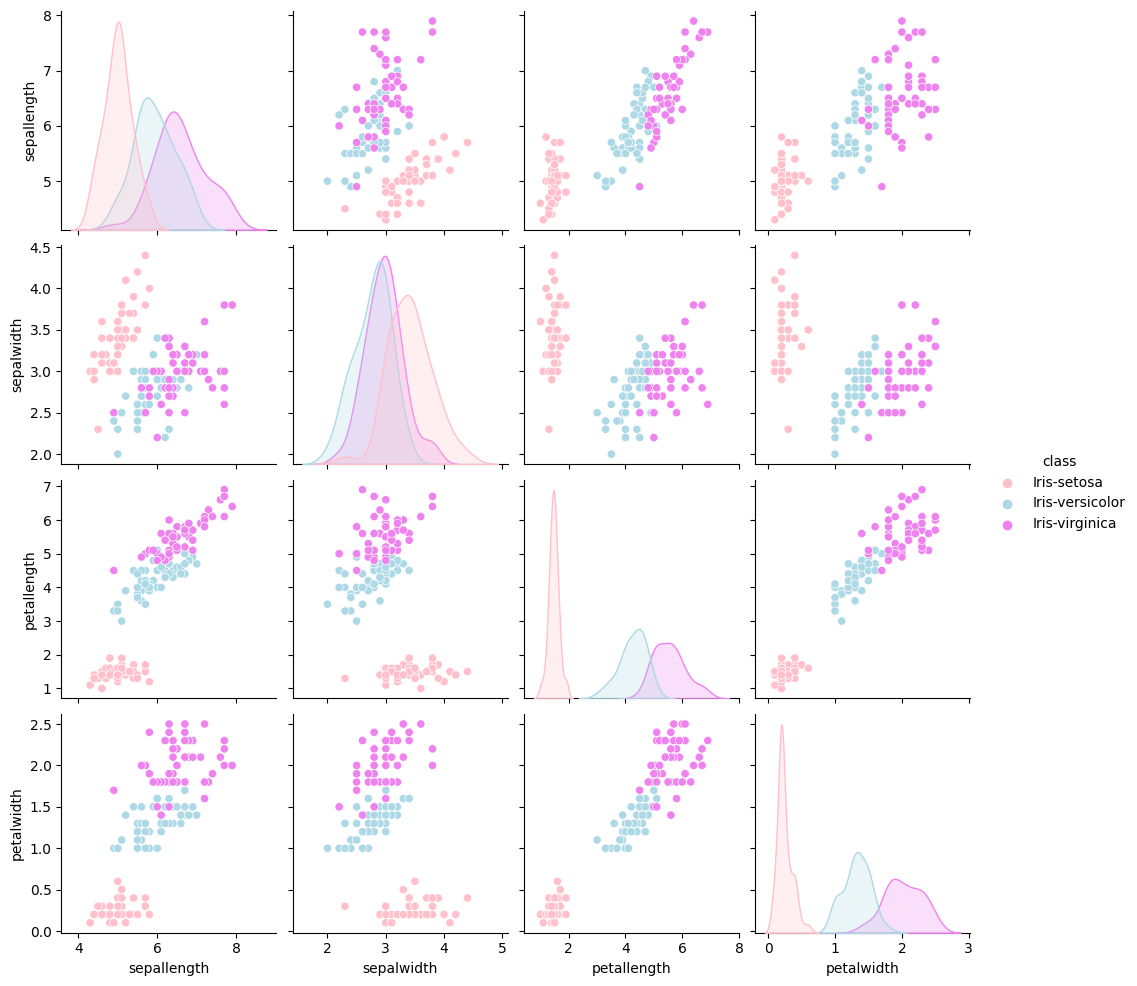

In [8]:
# 1.3
f2 = plt.figure(2)
sns.pairplot(df, hue='class', palette=['pink', 'lightblue', 'violet'])
plt.show()

<h2>2. Create PCA plot</h2>

1. Perform PCA for this data 
2. Visualize data on the principal components 1-2
3. Highlight the flower species by color for each sample
4. Are the species distinct

In [9]:
import plotly.express as px
from sklearn.decomposition import PCA
import sklearn.preprocessing as sp 
import sklearn.decomposition as sd

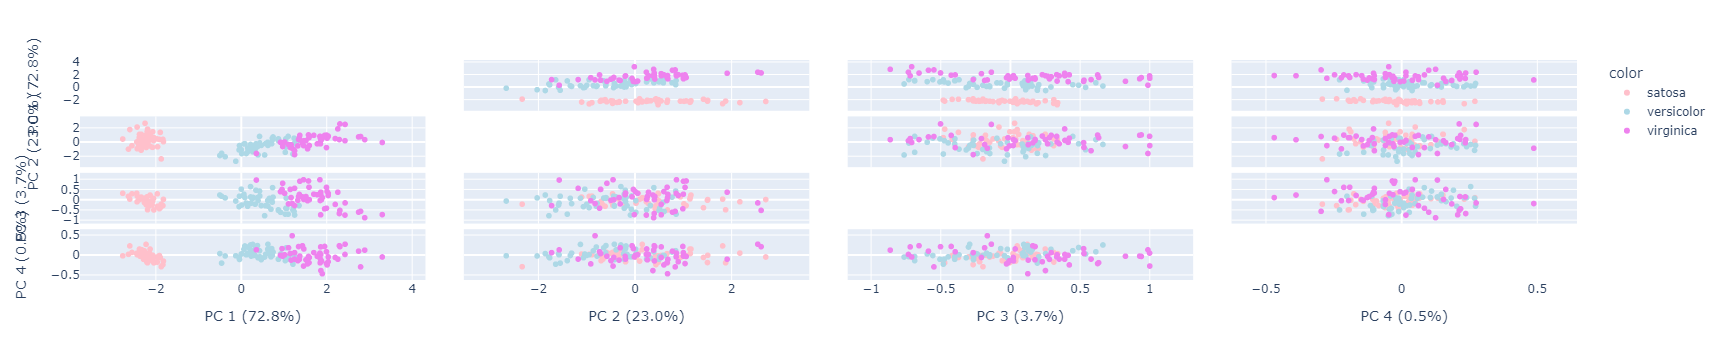

In [55]:
# 2.1
features = ["sepalwidth", "sepallength", "petalwidth", "petallength"]

# select quantitative variables
df_original = df[features]
# standardise variables to get similar variances
df_standardised = sp.StandardScaler().fit(df_original).transform(df_original)
# create PCA model
pca = sd.PCA().fit(df_standardised)
# transform data into new space
components = pd.DataFrame(pca.transform(df_standardised))

# pca = PCA()
# components = pca.fit_transform(df[features])

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color=df["class"],
    color_discrete_sequence=['pink', 'lightblue', 'violet'],
)
fig.update_traces(diagonal_visible=False)
fig.show()

<AxesSubplot:xlabel='0', ylabel='1'>

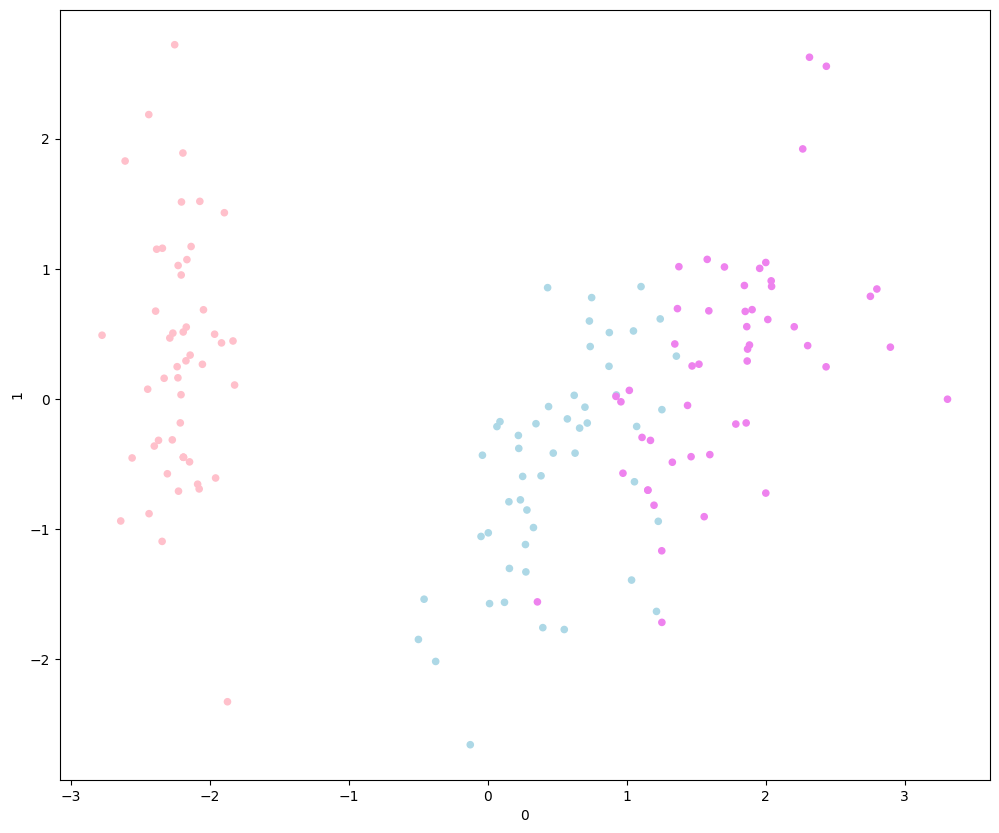

In [11]:
# 2.2 & 2.3
# add transformed data back to original data frame
iris_extended = pd.concat([df, components], axis=1)
iris_extended_copy = iris_extended.copy()

# visualise the first two PCA components and
# colour data points by seed variety
iris_extended_copy['color'] = iris_extended_copy['class'].map({'Iris-setosa': 'pink', 'Iris-versicolor': 'lightblue', 'Iris-virginica':'violet'})
iris_extended_copy.plot.scatter(0, 1, c="color", figsize=(12,10))


<h3>2.4 Setosa is clearly distinct. </h3>

<h2>3. PCA loadings</h2> 


1. Retrieve loadings for the PCA components
2. What are the most important features for component 1?
3. What are the most important features for component 2?

In [12]:
# 3.1
pca_features = pd.DataFrame(pca.components_, columns=df_original.columns, index=['PC1','PC2','PC3','PC4'])
pca_features

# weights of the variables in the component
# most of information is in first dimenssion (PC1)

,sepalwidth,sepallength,petalwidth,petallength
PC1,-0.263355,0.522372,0.565611,0.581254
PC2,0.925556,0.372318,0.065416,0.021095
PC3,0.242033,-0.721017,0.633801,0.140892
PC4,0.124135,-0.261996,-0.523546,0.801154


In [14]:
print(pca.explained_variance_ratio_)

[0.72770452 0.23030523 0.03683832 0.00515193]


3.2 Sepal lenth <br>
3.3 Sepal width

<h2> 4. PCA scores</h2>  

1. Calculate correlations between the original data features (axes)
2. Calculate correlations between the PCA features (axes)
3. Which features are the most correlated in each case?

In [21]:
# 4.1
df_original.corr()

#teacher used pearson here 

,sepalwidth,sepallength,petalwidth,petallength
sepalwidth,1.000000,-0.109369,-0.356544,-0.420516
sepallength,-0.109369,1.000000,0.817954,0.871754
petalwidth,-0.356544,0.817954,1.000000,0.962757
petallength,-0.420516,0.871754,0.962757,1.000000


In [27]:
# 4.2
display(pca_features.corr())
display(pca_features.T.corr())

,sepalwidth,sepallength,petalwidth,petallength
sepalwidth,1.000000,0.026501,-0.239241,-0.728597
sepallength,0.026501,1.000000,0.017640,0.053723
petalwidth,-0.239241,0.017640,1.000000,-0.484993
petallength,-0.728597,0.053723,-0.484993,1.000000


,PC1,PC2,PC3,PC4
PC1,1.000000,-0.947895,-0.147752,-0.069227
PC2,-0.947895,1.000000,-0.143383,-0.067180
PC3,-0.147752,-0.143383,1.000000,-0.010472
PC4,-0.069227,-0.067180,-0.010472,1.000000


4.3 <br>
In df_original Petal lenth/Petal width -> 0.962757<br>
In pca_features Petal lenth/Sepal width -> -0.728597

<h2>5. Clustering</h2>  

1. Cluster the samples into 3 clusters
2. Visualize the clusters on top of PCA
3. Compare with the known species per each sample
4. Does the unsupervised clustering correspond to the known species?


In [28]:
import sklearn.cluster as sc

<AxesSubplot:xlabel='0', ylabel='1'>

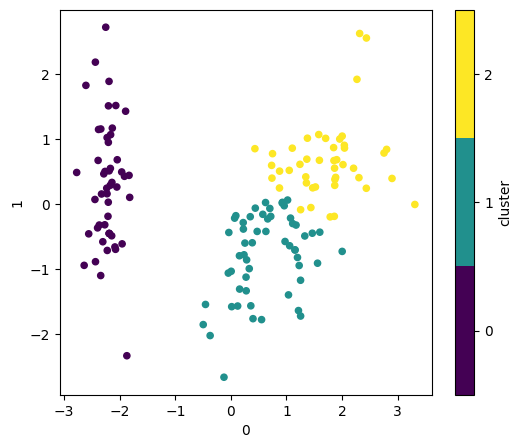

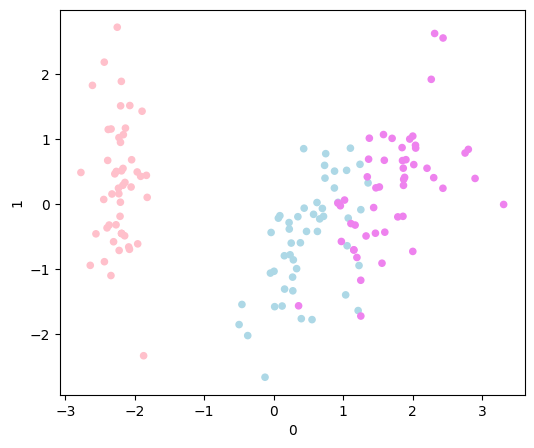

In [55]:
# 3.1
# create k-means model with three clusters
kmeans = sc.KMeans(n_clusters=3).fit(df_standardised)
# get memberships of data points in clusters
predictions = kmeans.predict(df_standardised)

cluster = iris_extended.copy()
cluster['cluster'] = pd.Categorical(predictions)
cluster.plot.scatter(0, 1, c='cluster', cmap="viridis", figsize=(6,5))
iris_extended_copy.plot.scatter(0, 1, c='color', figsize=(6,5))

In [56]:
# 3.3
# count how many times each variety-cluster pair appears in data
pd.crosstab(cluster['class'], cluster['cluster'] )

cluster,0,1,2
class,,,
Iris-setosa,50,0,0
Iris-versicolor,0,39,11
Iris-virginica,0,17,33


Prediction works well with the points/group that are clearly distinct.